# Report (IBM Coursera Capstone) - Car accident severity

## Introduction

One of the major issues on earth is car accidents. It can get pretty ugly depending on the severity. It's also dangerous. Accidents occur due to natural reasons (snow, storms, typhoons etc.), or due to negligence (drunk driving, or driving while high, or speeding up when angry, or just plain racing your friend to an invisible finish line you made up). Accidents can potentially result in property damage, injury and/or death. Rod Traffic Accidents are a global problem, and it's estimated to cause 13 million deaths, and 20-50 million disabilities worldwide annually. 85% of these injury related deaths recorded happen to occur in developing countries. According to WHO (2007), RTA injuries accounted for 23% of all injury deaths worldwide. This project will demonstrate the severity of car accidents in Seattle, WA.

## Data

There are several attributes to demonstrate the severity of the accidents, such as the weather, road condition, light condition, and junction type. These determine the accidents that occur naturally. And other attributes to define how negligent or unexpected accidents occur. We'll be using severity code as our target variable, as that's an easier way to define the severity of the accident on a scale from 0 to 5 within the dataset. Attributes like weather, road condition and light condition will be used to weigh the severity of the accidents.

- 0 : Little to no Probability (Clear Weather Conditions)
- 1 : Very Low Probability - Chance or Property Damage
- 2 : Low Probability - Chance of Injury
- 3 : Mild Probability - Chance of Serious Injury
- 4 : High Probability - Chance of Fatality

We'll be deciding the level of severity of accidents in accordance with the weather conditions.

## Methodology

I used JupyterLab from the anacondo software I've installed on my computer. I proceeded to use the algorithms obtained from the data visualization course and machine learning courses, as well as the external material, to clean out the data to better understand what we're dealing with. I'm a visual learner, that's why I leaned on the graphical side of things and decided to plot out bar charts for a clearer understanding of the situation.

In [3]:
import numpy as np
import pandas as pd

In [4]:
path="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
df=pd.read_csv(path)
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [5]:
# clean up the dataset to remove unnecessary columns (eg. INCKEY, COLDETKEY etc.) 
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 
         'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
         'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 
         'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [6]:
df.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Intersection,2,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,NaN,N,Clear,Dry,Daylight,Y,NaN,N
1,Intersection,2,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,Block,1,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
3,Intersection,1,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
4,Block,0,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [7]:
df.shape

(221266, 19)

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # just in case

from sklearn import preprocessing

In [9]:
df["INCDATE"]=df["INCDATE"].str[:10]
df[["YEAR", "MONTH", "DAY"]]=df["INCDATE"].str.split("/", expand=True)
df.drop("INCDATE", axis=1, inplace=True)

In [10]:
df.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,YEAR,MONTH,DAY
0,Intersection,2,Pedestrian,2,1,0,1,1,0,0,...,N,Clear,Dry,Daylight,Y,NaN,N,2019,11,20
1,Intersection,2,Angles,4,0,0,2,2,0,0,...,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,N,2019,11,18
2,Block,1,Sideswipe,4,0,0,3,0,0,0,...,N,Clear,Dry,Daylight,NaN,NaN,N,2020,02,20
3,Intersection,1,Left Turn,2,0,0,2,0,0,0,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N,2004,06,08
4,Block,0,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2004,10,15


In [12]:
# converting date from str to int type
df=df.astype({"UNDERINFL":str, "YEAR":int, "MONTH":int, "DAY":int})
df["UNDERINFL"].value_counts()

N      103482
0       81676
nan     26479
Y        5399
1        4230
Name: UNDERINFL, dtype: int64

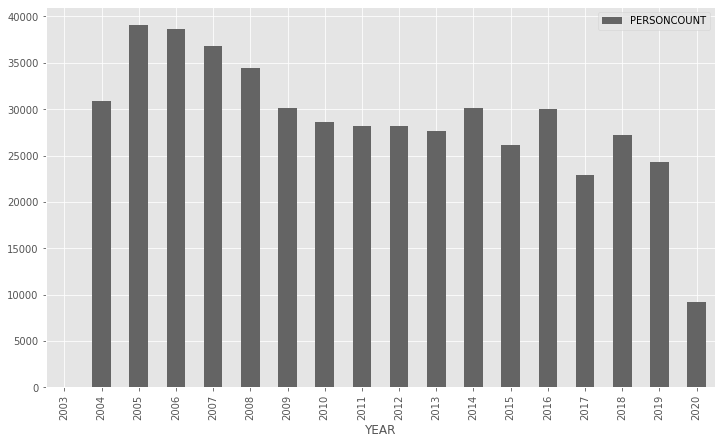

In [21]:
df[["YEAR", "PERSONCOUNT"]].groupby("YEAR").sum().plot(kind="bar", figsize=(12,7), color='#646464')

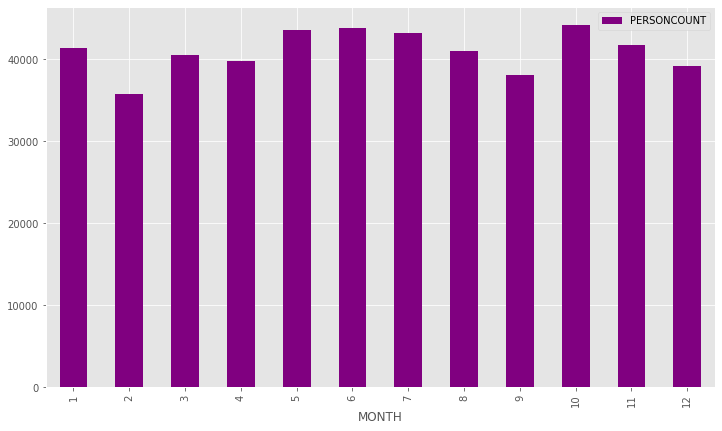

In [23]:
df[["MONTH", "PERSONCOUNT"]].groupby("MONTH").sum().plot(kind="bar", figsize=(12,7), color='#800080')


In [25]:
df.groupby("SEVERITYCODE").sum()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,YEAR,MONTH,DAY
SEVERITYCODE,,,,,,,,,,
0,4132,2,0,1,0,0,0,43534211,144799,334769
1,320159,725,685,267358,0,0,0,276502687,898145,2147036
2,159269,6575,4892,109745,78024,0,0,118063675,385504,915550
2b,7986,979,433,4861,4407,3249,0,6230455,20245,48605
3,1041,150,28,502,288,103,372,701928,2421,5503


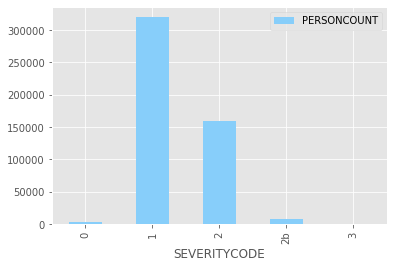

In [32]:
df[["SEVERITYCODE", "PERSONCOUNT"]].groupby("SEVERITYCODE").sum().plot(kind="bar", color="lightskyblue")

#### Accidents not occurring from natural causes

In [41]:
df_col=df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
df_col.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Pedestrian,NaN,N,Clear,Dry,Daylight,Y,NaN,N
1,2,Intersection,Angles,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Sideswipe,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
3,1,Intersection,Left Turn,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
4,0,Block,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,N


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


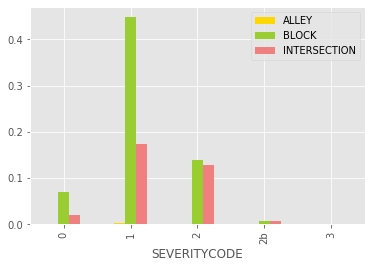

In [42]:
colors_list = ['gold', 'yellowgreen', 'lightcoral']
addrtype=pd.get_dummies(pd.DataFrame(df_col["ADDRTYPE"]))/df_col["ADDRTYPE"].count()

addrtype.columns =["ALLEY", "BLOCK", "INTERSECTION"]
addrtype
df_col=pd.concat([df_col, addrtype], axis=1)
df_col.drop("ADDRTYPE", axis=1, inplace=True)
df_col[["SEVERITYCODE", "ALLEY", "BLOCK", "INTERSECTION"]].groupby("SEVERITYCODE").sum().plot(kind="bar", colors=colors_list)

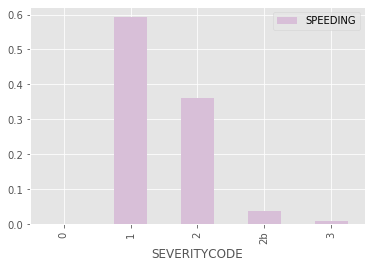

In [43]:
(df_col[["SEVERITYCODE", "SPEEDING"]].groupby("SEVERITYCODE").count()/df_col["SPEEDING"].count()).plot(kind="bar", color='#D8BFD8')

In [44]:
df_col["UNDERINFL"]=df_col["UNDERINFL"].replace(["1","0"], ["Y","N"])
df_col["UNDERINFL"].value_counts()

N      185158
nan     26479
Y        9629
Name: UNDERINFL, dtype: int64

In [46]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["UNDERINFL"])/df_col["UNDERINFL"].count()
df_5=pd.concat([df_3,df_4], axis=1)

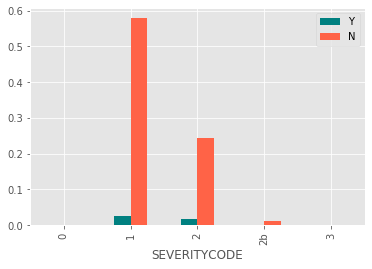

In [49]:

df_5[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar", color=('teal', 'tomato'))

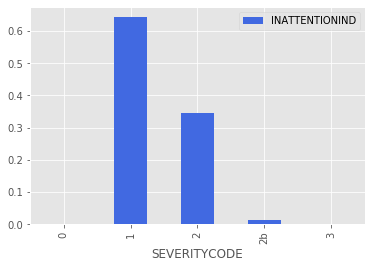

In [52]:
(df_col[["SEVERITYCODE", "INATTENTIONIND"]].groupby("SEVERITYCODE").count()/df_col["INATTENTIONIND"].count()).plot(kind="bar", color='#4169E1')

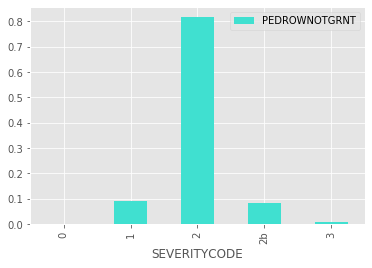

In [53]:
(df_col[["SEVERITYCODE", "PEDROWNOTGRNT"]].groupby("SEVERITYCODE").count()/df_col["PEDROWNOTGRNT"].count()).plot(kind="bar", color='turquoise')

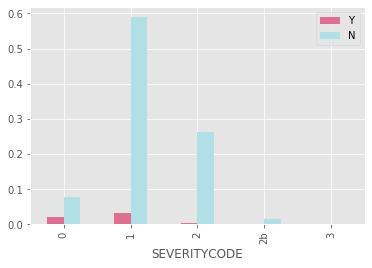

In [56]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["HITPARKEDCAR"])/df_col["HITPARKEDCAR"].count()
df_5=pd.concat([df_3,df_4], axis=1)
df_5[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar", color=('#DB7093', '#B0E0E6'))

In [58]:
df_col["COLLISIONTYPE"].value_counts()

Parked Car    48455
Angles        35469
Rear Ended    34624
Other         24528
Sideswipe     18855
Left Turn     14082
Pedestrian     7654
Cycles         5911
Right Turn     3008
Head On        2181
Name: COLLISIONTYPE, dtype: int64

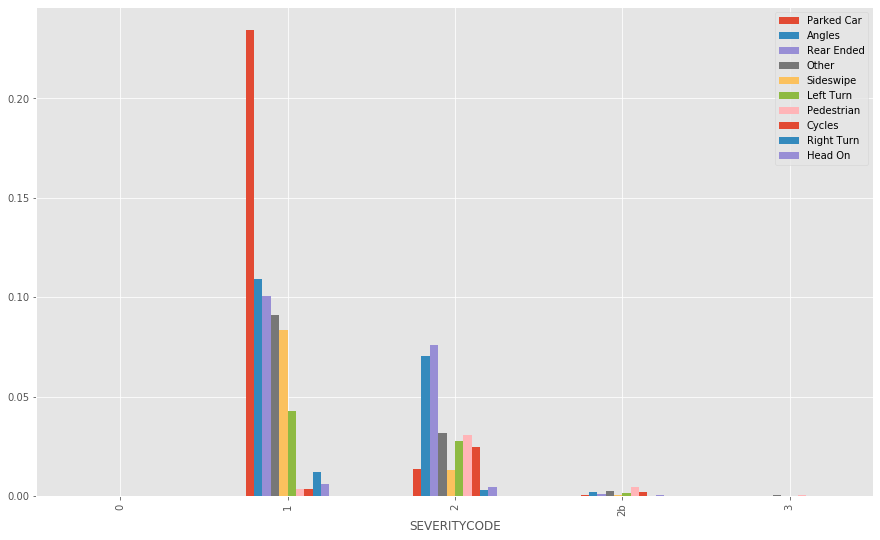

In [65]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["COLLISIONTYPE"])/df_col["COLLISIONTYPE"].count()
df_5=pd.concat([df_3,df_4], axis=1)
df_5[["SEVERITYCODE", "Parked Car", "Angles", "Rear Ended", "Other", "Sideswipe", "Left Turn", 
      "Pedestrian", "Cycles", "Right Turn", "Head On"]].groupby("SEVERITYCODE").sum().plot(kind="bar", figsize=(15, 9))

#### Now we'll look at accidents in relation to the environment

In [67]:
df_col["WEATHER"].value_counts()

Clear                       114361
Raining                      34021
Overcast                     28508
Unknown                      15131
Snowing                        919
Other                          853
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

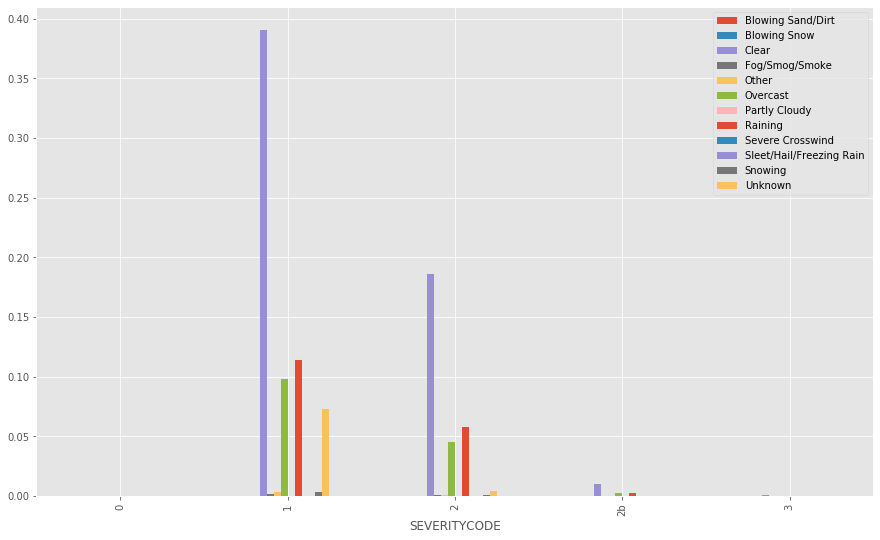

In [69]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["WEATHER"])/df_col["WEATHER"].count()
df_5=pd.concat([df_3,df_4], axis=1)
df_5[:].groupby("SEVERITYCODE").sum().plot(kind="bar", figsize=(15,9))

In [72]:
df_col["ROADCOND"].value_counts()

Dry               128171
Wet                48715
Unknown            15131
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

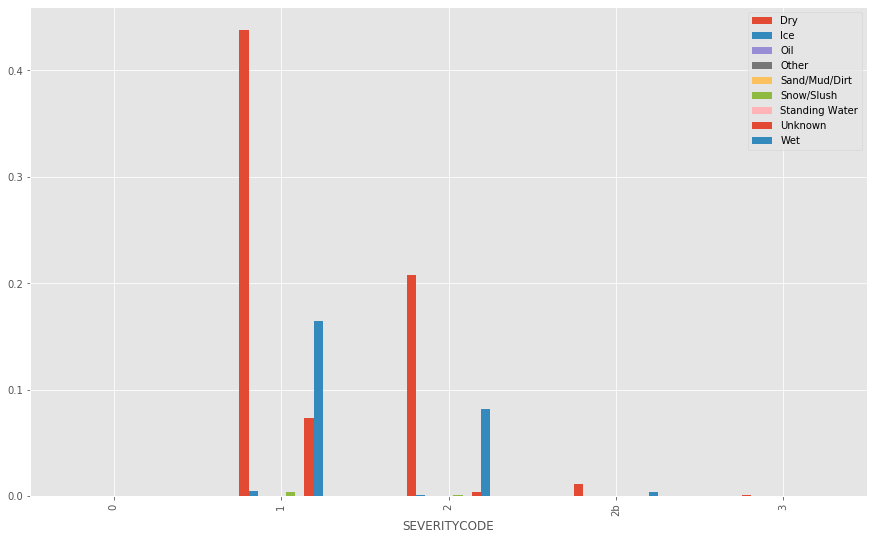

In [75]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["ROADCOND"])/df_col["ROADCOND"].count()
df_5=pd.concat([df_3,df_4], axis=1)
df_5[:].groupby("SEVERITYCODE").sum().plot(kind="bar", figsize=(15,9))

In [77]:
df_col["LIGHTCOND"].value_counts()

Daylight                    119166
Dark - Street Lights On      50053
Unknown                      13523
Dusk                          6076
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

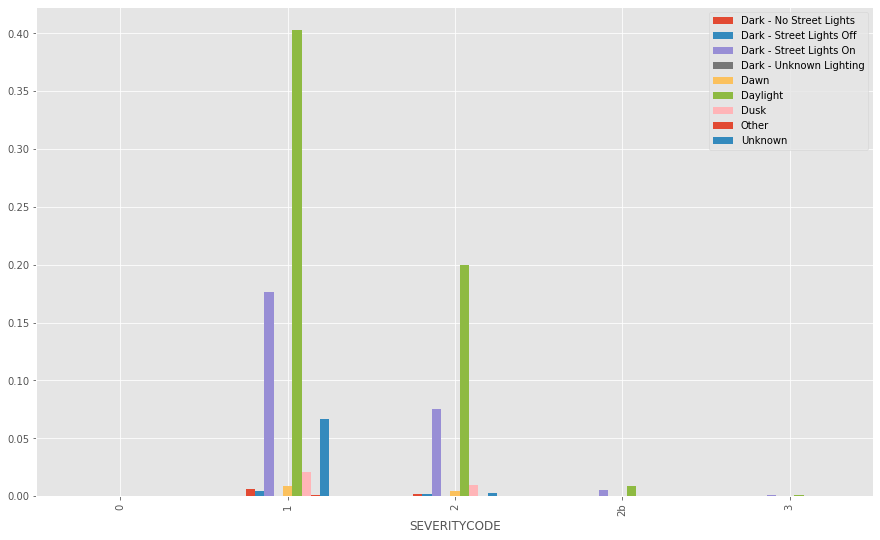

In [80]:
df_3=df_col["SEVERITYCODE"]
df_4=pd.get_dummies(df_col["LIGHTCOND"])/df_col["LIGHTCOND"].count()
df_5=pd.concat([df_3,df_4], axis=1)
df_5[:].groupby("SEVERITYCODE").sum().plot(kind="bar", figsize=(15,9))

## Discussion

Overall, we have a thorough dataset to make a few hypotheses based on the information provided. Some data had to be dropped due to too many missing elements. However, the remaining dataset helped us graph out visual info on the road conditions, light conditions etc. This could potentially help the city council and police to set up precautions like stop signs, traffic lights, no entry zones, adding cameras etc. to further decrease, if not prevent, accidents. As this is data science project, you can't help but wonder what sort of automated proedures could be implemented to help reduce the number of accidents from happening. Inbuilt technology could be in cars could help warn drivers of the road and weather conditions, thus resulting in a safer ride.

## Conclusion

Machine learning algorithms have helped us graph out the columns and get a visual representation of how accidents have occurred in the past, thus helping us anticipate what to expect, and hence prevent any further accidents from happening. Although it's impossible to prevent car accidents from happening entirely; it still helps to locate the hot-spots for most accidents and start taking precautions from there in accordance with our visual aid we have created in this project.